# 20기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

EDA

In [2]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,NaN,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,NaN,NaN,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,NaN,NaN,1413


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [3]:
missing_ratio = df[["Product_Category_2", "Product_Category_3"]].isnull().mean()
missing_ratio

Product_Category_2    0.306723
Product_Category_3    0.691076
dtype: float64

In [4]:
prod_cat2_stats = df["Product_Category_2"].describe()
prod_cat2_stats

count    3465.000000
mean        9.773737
std         5.101867
min         2.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        18.000000
Name: Product_Category_2, dtype: float64

In [5]:
df["Product_Category_2"].fillna(df["Product_Category_2"].median(), inplace=True)
df.drop(columns=["Product_Category_3"], inplace=True)

missing_after = df.isnull().sum()
missing_after

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

array([[<Axes: title={'center': 'User_ID'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Marital_Status'}>],
       [<Axes: title={'center': 'Product_Category_1'}>,
        <Axes: title={'center': 'Product_Category_2'}>,
        <Axes: title={'center': 'Product_Category_3'}>],
       [<Axes: title={'center': 'Purchase'}>, <Axes: >, <Axes: >]],
      dtype=object)

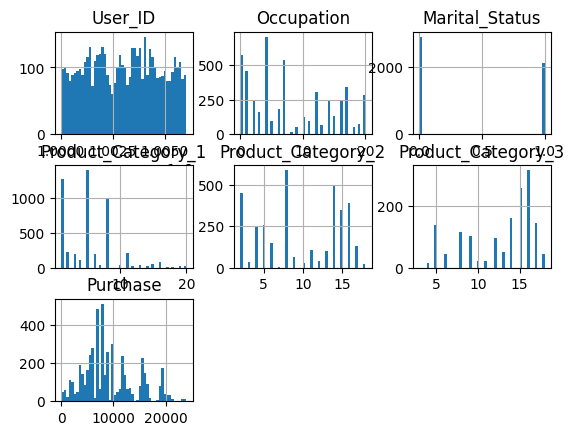

In [4]:
import matplotlib.pyplot as plt

df.hist(bins=50)

Preprocessing

In [9]:

data_encoded = pd.get_dummies(df, columns=selected_categorical_columns, drop_first=True)

data_encoded.drop(columns=["User_ID", "Product_ID"], inplace=True)

data_encoded.head()


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,5,17.0,2010,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10,0,7,9.0,4483,0,0,0,0,0,0,0,0,0,1,0,0,0
2,10,0,1,4.0,7696,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10,0,2,4.0,16429,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10,0,3,5.0,5780,0,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_encoded), columns=data_encoded.columns)
data_scaled.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0.5,0.0,0.210526,0.9375,0.083556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.5,0.0,0.315789,0.4375,0.187029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.5,0.0,0.000000,0.1250,0.321464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.5,0.0,0.052632,0.1250,0.686862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.5,0.0,0.105263,0.1875,0.241297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 2. KNN 구현 & 파라미터 튜닝

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data_scaled.drop("Purchase", axis=1)
y = data_scaled["Purchase"]

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((3998, 17), (1000, 17))

In [15]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def get_neighbors(X_train, test_point, k):
    distances = list()
    X_train_array = X_train.to_numpy() 
    
    for train_point in X_train_array:
        distance = euclidean_distance(test_point, train_point)
        distances.append(distance)
        
    k_indices = np.argsort(distances)[: k]
    
    return k_indices

def knn_predict(X_train, y_train, test_point, k):
    neghbors_indices = get_neighbors(X_train, test_point, k)
    mean_value = np.mean(y_train.iloc[neghbors_indices])
    
    return mean_value

def knn_regressor(X_train, y_train, X_test, k):
    predictions = list()
    
    for test_point in X_test.to_numpy():
        predicted_value = knn_predict(X_train, y_train, test_point, k)
        predictions.append(predicted_value)
        
    return predictions

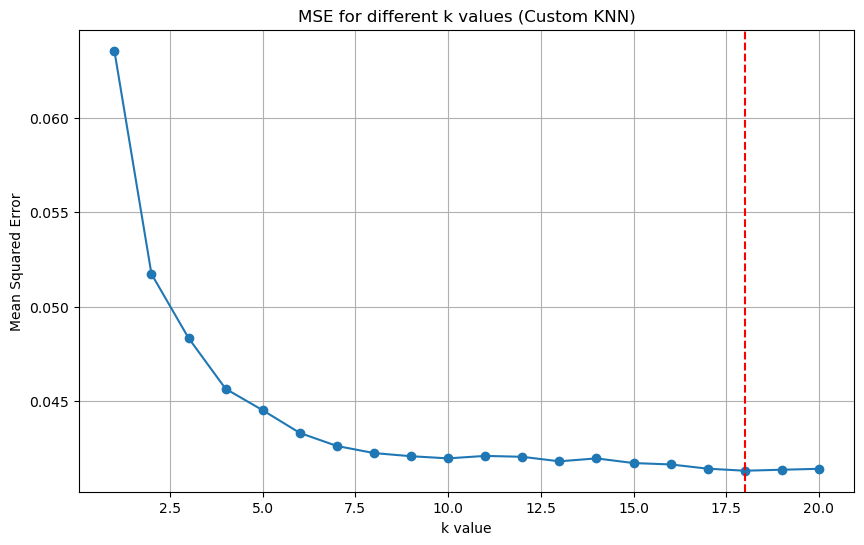

In [18]:
mse_values = list()
k_values = range(1, 21)

for k in k_values:
    y_pred_k = knn_regressor(X_train, y_train, X_test, k)
    mse_k = mean_squared_error(y_test, y_pred_k)
    mse_values.append(mse_k)
    
optimal_k = k_values[mse_values.index(min(mse_values))]

plt.figure()
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel("k value")
plt.ylabel("Mean Squared Error")
plt.title("MSE for different k values (Custom KNN)")
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.grid(True)
plt.show()

## 3. Evaluation

In [19]:
y_pred = knn_regressor(X_train, y_train, X_test, 18)
mse = mean_squared_error(y_test, y_pred)
mse

0.04128388655711042